In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1. Definimos datos de ejemplo
# y_true: Las etiquetas reales (la verdad)
# y_pred: Lo que nuestro modelo de IA ha predicho
# (0 = No Spam, 1 = Spam)
y_true = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 1, 1]

# 2. Calculamos la Matriz de Confusión
# El orden por defecto es: [TN, FP], [FN, TP]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(f"--- Matriz de Confusión ---")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}\n")

# 3. Calculamos las métricas fundamentales
print(f"--- Métricas de Rendimiento ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.2f}")
print(f"Precisión (Precision): {precision_score(y_true, y_pred):.2f}")
print(f"Exhaustividad (Recall): {recall_score(y_true, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")

--- Matriz de Confusión ---
Verdaderos Negativos (TN): 3
Falsos Positivos (FP): 1
Falsos Negativos (FN): 1
Verdaderos Positivos (TP): 5

--- Métricas de Rendimiento ---
Exactitud (Accuracy): 0.80
Precisión (Precision): 0.83
Exhaustividad (Recall): 0.83
F1-Score: 0.83


In [2]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



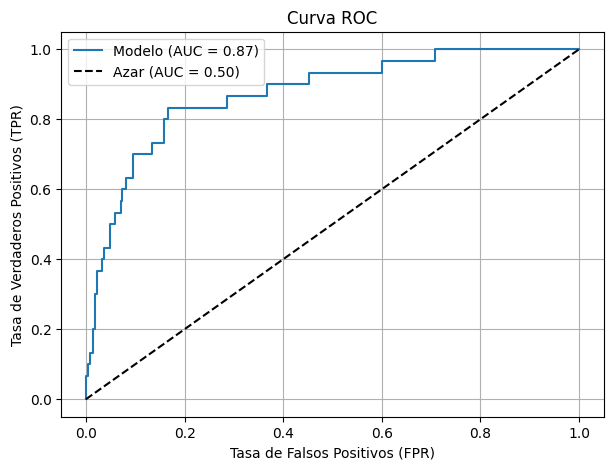

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Generamos datos desbalanceados (90% clase 0, 10% clase 1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenamos un modelo simple
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Obtenemos las probabilidades (necesarias para la curva ROC)
# Tomamos la columna [:, 1] que es la probabilidad de ser clase "1"
probs = model.predict_proba(X_test)[:, 1]

# 4. Calculamos el AUC y la curva
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

# 5. Visualización
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Modelo (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.50)') # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

--- 📊 REPORTE DE MÉTRICAS DE REGRESIÓN ---
MAE (Error Absoluto):      0.7230 (El error promedio es de 0.72 miles de €)
MSE (Error Cuadrático):    0.7754 (Difícil de interpretar directamente)
RMSE (Raíz del MSE):       0.8806 (El error estándar es de 0.88 miles de €)
R² (Score):                0.7772 (El modelo explica el 77.7% de la varianza)
R² Ajustado:               0.7648 (Ajuste por complejidad del modelo)


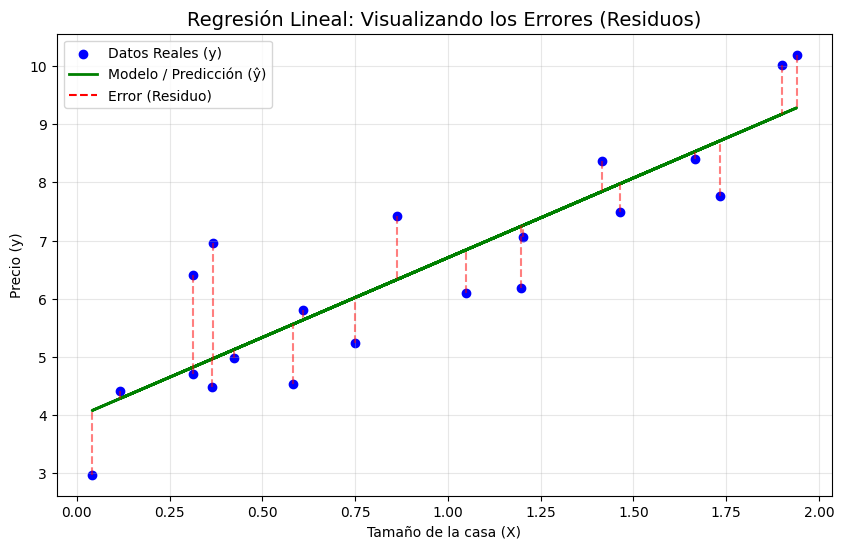

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. GENERACIÓN DE DATOS (Dataset Inline) ---
# Simulamos datos: X = Tamaño (m2), y = Precio (miles de €)
np.random.seed(42) # Semilla para reproducibilidad
X = 2 * np.random.rand(20, 1) # 20 casas aleatorias
y = 4 + 3 * X + np.random.randn(20, 1) # Precio con un poco de "ruido" (varianza natural)

# --- 2. ENTRENAMIENTO DEL MODELO ---
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X) # Predicciones del modelo

# --- 3. CÁLCULO DE MÉTRICAS ---

# A) MAE (Error Absoluto Medio)
# Promedio de la diferencia absoluta.
mae = mean_absolute_error(y, y_pred)

# B) MSE (Error Cuadrático Medio)
# Promedio de los errores al cuadrado (penaliza mucho los fallos grandes).
mse = mean_squared_error(y, y_pred)

# C) RMSE (Raíz del Error Cuadrático Medio)
# Devuelve el error a las unidades originales (miles de €).
# Nota: En sklearn versiones nuevas existe root_mean_squared_error,
# pero la forma más compatible es la raíz del MSE.
rmse = np.sqrt(mse)

# D) R2 (Coeficiente de Determinación)
# Qué porcentaje de la varianza explicamos (0 a 1).
r2 = r2_score(y, y_pred)

# E) R2 Ajustado (Cálculo manual)
# Penaliza si añadimos variables inútiles.
n = len(y)        # Número de muestras (20)
p = X.shape[1]    # Número de variables predictoras (1)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# --- 4. IMPRESIÓN DE RESULTADOS ---
print(f"--- 📊 REPORTE DE MÉTRICAS DE REGRESIÓN ---")
print(f"MAE (Error Absoluto):      {mae:.4f} (El error promedio es de {mae:.2f} miles de €)")
print(f"MSE (Error Cuadrático):    {mse:.4f} (Difícil de interpretar directamente)")
print(f"RMSE (Raíz del MSE):       {rmse:.4f} (El error estándar es de {rmse:.2f} miles de €)")
print(f"R² (Score):                {r2:.4f} (El modelo explica el {r2*100:.1f}% de la varianza)")
print(f"R² Ajustado:               {r2_ajustado:.4f} (Ajuste por complejidad del modelo)")

# --- 5. VISUALIZACIÓN GRÁFICA ---
plt.figure(figsize=(10, 6))

# a) Dibujar los datos reales
plt.scatter(X, y, color='blue', label='Datos Reales (y)')

# b) Dibujar la línea de regresión (predicción)
plt.plot(X, y_pred, color='green', linewidth=2, label='Modelo / Predicción (ŷ)')

# c) Dibujar los ERRORES (Residuos)
# Estas líneas rojas son lo que miden MAE y MSE
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linestyle='--', alpha=0.5)

# Decoración del gráfico
plt.title('Regresión Lineal: Visualizando los Errores (Residuos)', fontsize=14)
plt.xlabel('Tamaño de la casa (X)')
plt.ylabel('Precio (y)')
plt.legend()
plt.grid(True, alpha=0.3)

# Mostrar solo la primera leyenda de "Error" para no saturar
plt.plot([], [], color='red', linestyle='--', label='Error (Residuo)')
plt.legend()

plt.show()

--- 🚨 IMPACTO DEL OUTLIER 🚨 ---
MSE Original: 0.78  --->  MSE con Outlier: 9.24 (¡Se ha disparado!)
R² Original:  0.78  --->  R² con Outlier:  0.00 (El modelo ha empeorado drásticamente)


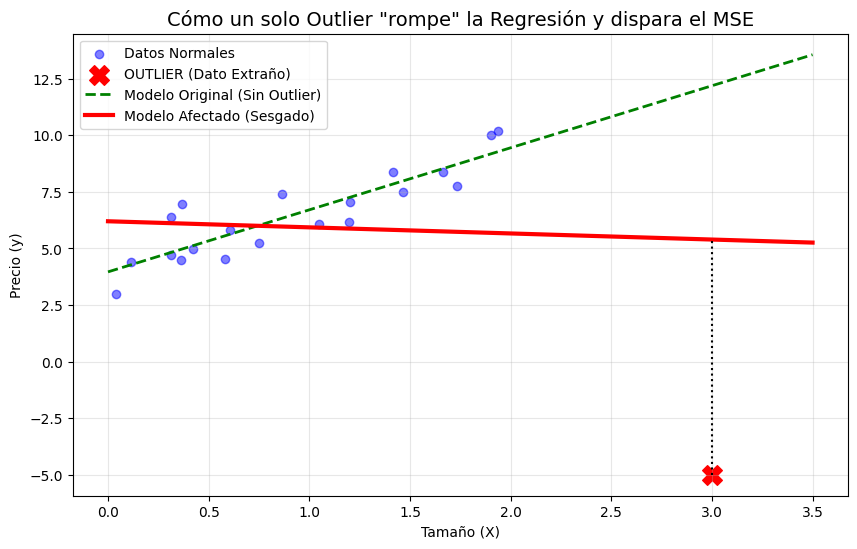

In [5]:
# --- 6. EL EXPERIMENTO DEL OUTLIER (Añadimos un dato "tóxico") ---

# 1. Crear el Outlier
# Añadimos un punto en X=3 (lejos) con valor Y=-5 (muy negativo, rompiendo la tendencia positiva)
X_outlier = np.vstack([X, [[3.0]]])
y_outlier = np.vstack([y, [[-5.0]]])

# 2. Entrenar un NUEVO modelo con el dato contaminado
model_bad = LinearRegression()
model_bad.fit(X_outlier, y_outlier)
y_pred_bad = model_bad.predict(X_outlier)

# 3. Recalcular métricas para ver el desastre
mse_bad = mean_squared_error(y_outlier, y_pred_bad)
r2_bad = r2_score(y_outlier, y_pred_bad)

# --- 4. COMPARATIVA DE IMPACTO ---
print(f"--- 🚨 IMPACTO DEL OUTLIER 🚨 ---")
print(f"MSE Original: {mse:.2f}  --->  MSE con Outlier: {mse_bad:.2f} (¡Se ha disparado!)")
print(f"R² Original:  {r2:.2f}  --->  R² con Outlier:  {r2_bad:.2f} (El modelo ha empeorado drásticamente)")

# --- 5. VISUALIZACIÓN DEL DAÑO ---
plt.figure(figsize=(10, 6))

# a) Datos originales (Azul) y el Outlier (Rojo Gigante)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos Normales')
plt.scatter([3.0], [-5.0], color='red', s=200, marker='X', label='OUTLIER (Dato Extraño)')

# b) Línea del modelo ORIGINAL (Punteada Verde) - Lo que debería ser
X_range = np.linspace(0, 3.5, 100).reshape(-1, 1)
plt.plot(X_range, model.predict(X_range), color='green', linestyle='--', linewidth=2, label='Modelo Original (Sin Outlier)')

# c) Línea del modelo AFECTADO (Sólida Roja) - Cómo el outlier "tira" de la línea
plt.plot(X_range, model_bad.predict(X_range), color='red', linewidth=3, label='Modelo Afectado (Sesgado)')

# Decoración
plt.title('Cómo un solo Outlier "rompe" la Regresión y dispara el MSE', fontsize=14)
plt.xlabel('Tamaño (X)')
plt.ylabel('Precio (y)')
plt.legend()
plt.grid(True, alpha=0.3)

# Mostrar la distancia del error del outlier (línea vertical negra)
plt.plot([3.0, 3.0], [-5.0, model_bad.predict([[3.0]])[0][0]], color='black', linestyle=':', label='Error del Outlier')

plt.show()

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# 1. Generamos datos de ejemplo (100 filas)
X, y = make_classification(n_samples=100, random_state=42)

# --- ESTRATEGIA A: TRAIN/TEST SPLIT ---
# Dividimos una sola vez: 80% estudiar, 20% examen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_a = LogisticRegression()
model_a.fit(X_train, y_train)
score_a = model_a.score(X_test, y_test)

print(f"--- Estrategia Train/Test ---")
print(f"Nota del examen único: {score_a:.2f} (Puede ser suerte)")

# --- ESTRATEGIA B: CROSS VALIDATION (K-Fold) ---
# K=5: Haremos 5 exámenes diferentes
model_b = LogisticRegression()
# cross_val_score hace todo el trabajo sucio por nosotros
scores_b = cross_val_score(model_b, X, y, cv=5)

print(f"\n--- Estrategia K-Fold (K=5) ---")
print(f"Notas de los 5 exámenes: {scores_b}")
print(f"Nota PROMEDIO real: {scores_b.mean():.2f} (Más fiable)")

--- Estrategia Train/Test ---
Nota del examen único: 1.00 (Puede ser suerte)

--- Estrategia K-Fold (K=5) ---
Notas de los 5 exámenes: [1.   1.   1.   0.95 0.95]
Nota PROMEDIO real: 0.98 (Más fiable)


In [7]:
import joblib
from sklearn.linear_model import LinearRegression

# 1. Supongamos que este es tu modelo YA ENTRENADO y VALIDADO
# (Usamos un ejemplo simple)
modelo = LinearRegression()
X = [[1], [2], [3]]
y = [2, 4, 6]
modelo.fit(X, y)

print("✅ Modelo entrenado. Predicción para 5: ", modelo.predict([[5]]))

# --- PASO A: GUARDAR EL MODELO (Serialización) ---
# Usamos joblib.dump(objeto, 'nombre_archivo.pkl')
filename = 'mi_super_modelo_v1.pkl'
joblib.dump(modelo, filename)

print(f"💾 El modelo se ha guardado exitosamente en '{filename}'")
print("... Simulamos que cerramos el programa y pasa el tiempo ...\n")

# --- PASO B: CARGAR EL MODELO (Deserialización) ---
# Ahora puedes estar en otro script, otro día, o en un servidor web.
# No necesitas tener los datos de entrenamiento (X, y) originales, solo el archivo.

modelo_cargado = joblib.load(filename)

print("📂 Modelo cargado desde el disco.")

# --- PASO C: USARLO EN PRODUCCIÓN ---
# El modelo cargado recuerda todo lo que aprendió.
nueva_prediccion = modelo_cargado.predict([[5]])
print(f"🔮 Predicción del modelo cargado para 5: {nueva_prediccion}")

✅ Modelo entrenado. Predicción para 5:  [10.]
💾 El modelo se ha guardado exitosamente en 'mi_super_modelo_v1.pkl'
... Simulamos que cerramos el programa y pasa el tiempo ...

📂 Modelo cargado desde el disco.
🔮 Predicción del modelo cargado para 5: [10.]
